In [1]:
import numpy as np
import matplotlib.pyplot as plt

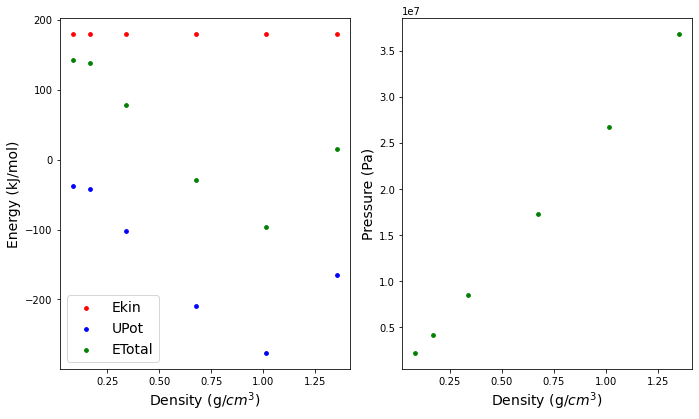

In [4]:
rhos = ["0.050", "0.100", "0.200", "0.400", "0.600", "0.800"]

mass = 40.0
sig = 3.4

fig, (ax1, ax2) = plt.subplots(1, 2)
legend = 1
for rho in rhos:
    filename = "thermodynamics_{}.dat".format(rho)
    time = read_file(filename,0)
    ekin = read_file(filename,1)
    upot = read_file(filename,2)
    etotal = read_file(filename,3)
    temp = read_file(filename,4)
    press = read_file(filename,5)
    
    ekin_av = 0.0
    for i in range(len(ekin)):
        if i >= 100:
            ekin_av = ekin_av + ekin[i]
    ekin_av = ekin_av/len(ekin)
    
    upot_av = 0.0
    for i in range(len(ekin)):
        if i >= 100:
            upot_av = upot_av + upot[i]
    upot_av = upot_av/len(ekin)
    
    etotal_av = 0.0
    for i in range(len(ekin)):
        if i >= 100:
            etotal_av = etotal_av + etotal[i]
    etotal_av = etotal_av/len(ekin)
    
    press_av = 0.0
    for i in range(len(ekin)):
        if i >= 100:
            press_av = press_av + press[i]
    press_av = press_av/len(ekin)
    
    rho_plot = float(rho)*mass/((6.022*10**23)*(sig*(10**(-8)))**3)
    if legend == 1:
        ax1.scatter(rho_plot, ekin_av, color="red", s = 14, label="Ekin")
        ax1.scatter(rho_plot, upot_av, color="blue", s = 14, label="UPot")
        ax1.scatter(rho_plot, etotal_av, color="green", s = 14, label="ETotal")
    else:
        ax1.scatter(rho_plot, ekin_av, color="red", s = 14)
        ax1.scatter(rho_plot, upot_av, color="blue", s = 14)
        ax1.scatter(rho_plot, etotal_av, color="green", s = 14)
        
    ax2.scatter(rho_plot, press_av, color="green", s = 14)
    legend += 1
    
ax1.set_xlabel("Density (g/$cm^3$)", fontsize = 14.0)
ax1.set_ylabel("Energy (kJ/mol)", fontsize = 14.0)
ax1.legend(loc="lower left", prop={'size': 14})

ax2.set_xlabel("Density (g/$cm^3$)", fontsize = 14.0)
ax2.set_ylabel("Pressure (Pa)", fontsize = 14.0)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

fig = plt.gcf()
fig.tight_layout(pad=.0)
fig.set_size_inches(10, 6)
fig.savefig('energies_pressure_liquid.pdf')

plt.show()

In [ ]:
rhos = ["0.050", "0.100", "0.200", "0.400", "0.600", "0.800"]

fig, ax = plt.subplots(1, 1)
for rho in rhos:
    filename = "thermodynamics_{}.dat".format(rho)
    time = read_file(filename,0)
    press = read_file(filename,5)
        
    for i in range(len(time)):
        time[i] = time[i]*10**(12)
        
    legend = r"$\rho$ = {}".format(rho)
    ax.plot(time, press, label = legend)
    
ax.set_xlabel("Time (ps)", fontsize = 14.0)
ax.set_ylabel("Pressure (Pa)", fontsize = 14.0)
ax.legend(loc="lower left", prop={'size': 14})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.ylim([0, 6.5e7])
plt.xlim([10, 100])

fig = plt.gcf()
fig.tight_layout(pad=.0)
fig.set_size_inches(10, 6)
ax.legend(loc="upper right", mode = "expand", ncol=6, prop={'size': 12})
fig.savefig('pressure_evolution.pdf')

plt.show()

Diffusion coeficient for 0.050 = 0.055412137912783786
Diffusion coeficient for 0.800 = 0.0322462196404612


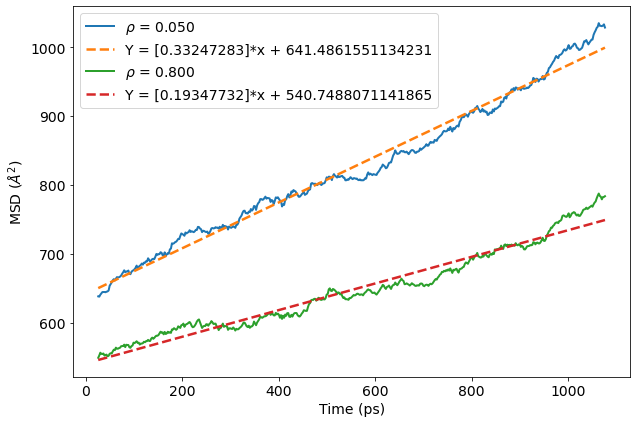

In [8]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(1, 1)

rhos = ["0.050","0.800"]
for rho in rhos:
    filename = "msd_{}.dat".format(rho)
    time_initial = read_file(filename,0)
    msd_initial = read_file(filename,1)

    msd = np.empty(0)
    time = np.empty(0)

    for i in range(len(msd_initial)):
        if i > 10:
            msd = np.append(msd, msd_initial[i])
            time = np.append(time, time_initial[i])

    for i in range(len(time)):
        time[i] = time[i]*10**(12)

    time = time.reshape((-1,1))
    model = LinearRegression().fit(time, msd)

    slope = model.coef_
    origin = model.intercept_

    def f(x):
        return origin + x*slope

    x = np.linspace(time[0], time[-1], len(time))
    theo_x = f(x)
    
    legend_1 = r"$\rho$ = {}".format(rho)
    legend_2 = "Y = {}*x + {}".format(slope, origin)

    ax.plot(time, msd, label = legend_1, linewidth = 2.0)
    ax.plot(x, theo_x, label = legend_2, linestyle="dashed", linewidth = 2.5)
    
    coeff_diff = slope/6
    print("Diffusion coeficient for {} =".format(rho), float(coeff_diff))
    
ax.set_xlabel("Time (ps)", fontsize = 14.0)
ax.set_ylabel("MSD ($\AA^2$)", fontsize = 14.0)
ax.legend(loc="upper left", prop={'size': 14})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

fig = plt.gcf()
fig.tight_layout(pad=.1)
fig.set_size_inches(10, 6)
fig.savefig('msd.pdf')

plt.show()


In [2]:
def read_file(filename, column):
    with open(filename, 'r') as data:
        x = []
        for line in data:
            p = line.split()
            x.append(float(p[column]))

    return x